In [4]:
import numpy as np
from scipy.integrate import solve_ivp, trapezoid #solve initial value problem, compute numerical integral
from scipy.linalg import null_space
from matplotlib import pyplot as plt
from IPython.display import display

# A complex stochastic system approaches equilibrium (arbitrary number of states) 

In [5]:
# Build a ladder of evenly spaced energy levels
energy_ladder = lambda energy_scale, number_of_states: np.linspace(energy_scale*1, energy_scale*number_of_states, number_of_states)

def arrhenius_transition_rate_matrix(energies, number_of_states, energy_barrier_difficulty=1.1, β=1, A=1): #for the equilibration regime
    # The energy barrier difficulty determines by what factor the barrier between two states is larger than the higher energy state between them
    #assuming β=1, A=1 for thermodynamic temperature and prefactor


    # Systematically define an energy barrier height, h, between two energy levels
    h = lambda ε1, ε2 : energy_barrier_difficulty * max(ε1, ε2)
    
    # Calculate the Arrhenius transition rate between two energy levels, going from ε1 to ε2
    arrhenius_rate = lambda ε1, ε2 : A * np.exp(-β*(h(ε1, ε2) - ε1))

    W = np.zeros(shape=(number_of_states, number_of_states))

    for i in range(number_of_states): # Column index
        for j in range(number_of_states): # Row index
            if i != j:  # Skip diagonal elements
                W[i, j] = arrhenius_rate(energies[i], energies[j]) # Transition rate going from state i to state j

    for k in range(number_of_states): # Diagonal index
        W[k, k] = -np.sum(W[:, k]) # Negative sum across the columns (Eq. 30 of Van den Broeck)
    
    return W
    

def random_initial_condition(number_of_states):

    weights = np.random.rand(number_of_states)
    normalized_probabilities = weights/np.sum(weights)

    return normalized_probabilities

In [6]:
def to_equilibrium_master_equation(time, probability_vector, transition_rate_matrix):
    
    W = transition_rate_matrix
    p = probability_vector
    dpdt = W @ p # This is the "master equation."
    
    return dpdt
    
def solve_master_equation_to_equilibrium(p_0, transition_rate_matrix, t_b, t_a=0, numtimes=100000):

    time_array = np.linspace(t_a, t_b, numtimes)
    solution = solve_ivp(fun=to_equilibrium_master_equation, t_span=[t_a, t_b], y0=p_0, t_eval=time_array, args=(transition_rate_matrix,))
    probability_vector_in_time = solution.y
    
    return time_array, probability_vector_in_time

In [13]:
N = 50
end_time = 0.2

np.random.seed(1)
p0 = random_initial_condition(N)
energies = energy_ladder(energy_scale = 0.01, number_of_states=N)

fifty_states_matrix = arrhenius_transition_rate_matrix(energies, number_of_states=N, energy_barrier_difficulty=1.1)
print('Column sum is ', np.sum(fifty_states_matrix[:, 0])) # Check that sum of columns is zero
times, probabilities = solve_master_equation_to_equilibrium(p_0 = p0, transition_rate_matrix = fifty_states_matrix, t_b = end_time, t_a = 0)

Column sum is  3.3306690738754696e-15


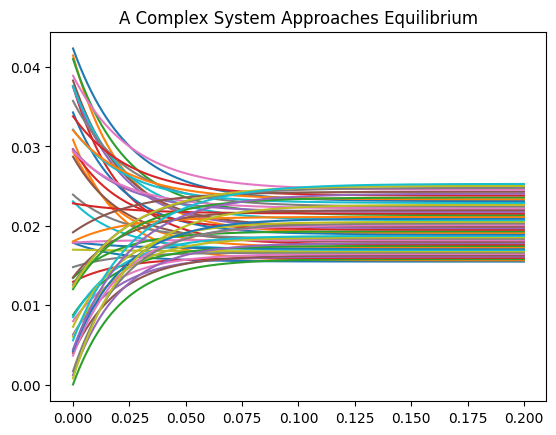

In [14]:
plt.title('A Complex Stochastic System Approaches Equilibrium')
plt.plot(times, probabilities.T)
plt.show()